Youtube graph theory playlist looks really good https://www.youtube.com/playlist?list=PLDV1Zeh2NRsDGO4--qE8yH72HFL1Km93P


Can think of a graph as a sequence of decisions

Breadth first search: looks for shortest paths or other things. Looks at all nodes connected to start node, then nodes connected to that one, and so on. Time complexity O(V + E) - vertices plus edfes

Depth first search: same uses as breadth first search. Picks one node connected to start node at random, then a random node connected to that node, and so on. Whenever it runs out of options or hits a node it's already reached, it goes in another direction from the most recent node that has other options. Then repeats until everything is visited. Time complexity O(V + E). 




### Breadth first search
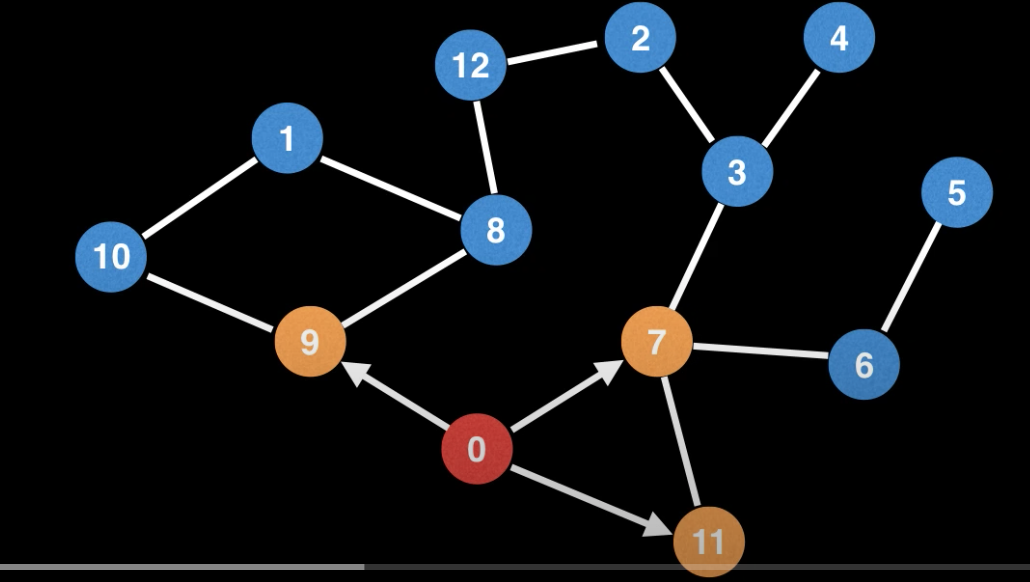


Topological sort for DAG: make direction of vertices fit a hierarchy of node priority, eg: the below is “4 5 2 3 1 0”

Topological sort only works on a DAG

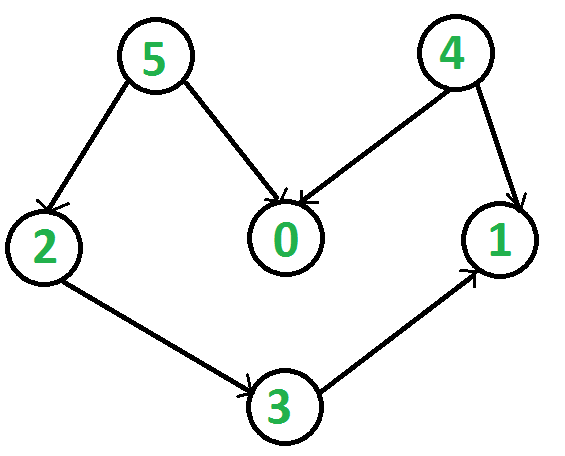

Sink vertex: node with incoming but no outgoing edges

A directed graph is strongly connected if there is a path between all pairs of vertices


## Strongly connected components

A strongly connected component (SCC) of a directed graph is a maximal strongly connected subgraph. For example, there are 3 SCCs in the following graph.

Calculating strongly connected components might help decide where to add contraction hierarchies. 

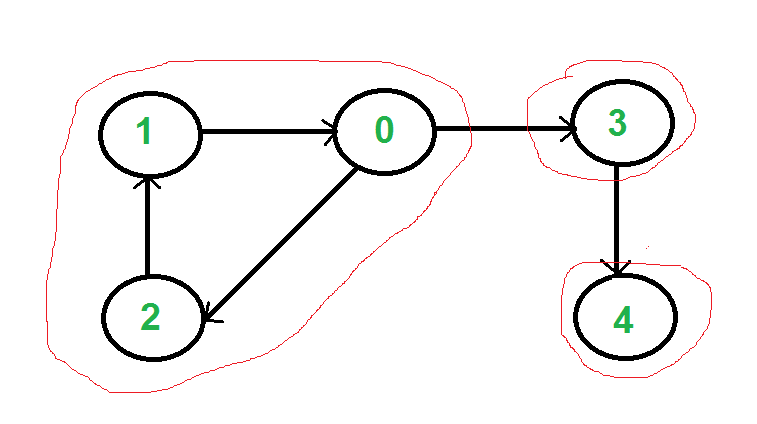



Get strongly connected components with Kosaraju's two pass algorithm in O(V + E)

>run depth first search (DFS) on reverse of graph, recording finishing times

>run DFS on graph, processing nodes in order of finished times from step above

Transpose of a graph = reverse of all edge directions (just semantics)


This is good explanation of Kosaraju's algo, though I don't fully get it: https://www.youtube.com/watch?v=5wFyZJ8yH9Q&t=152s&ab_channel=GeeksforGeeks







### Balanced binary search tree

node based tree which automatically minimises it's depth

Self-balancing binary trees perform transformations on the tree (such as tree rotations) at key insertion times, in order to keep the height proportional to log2(n).


## Unbalanced tree

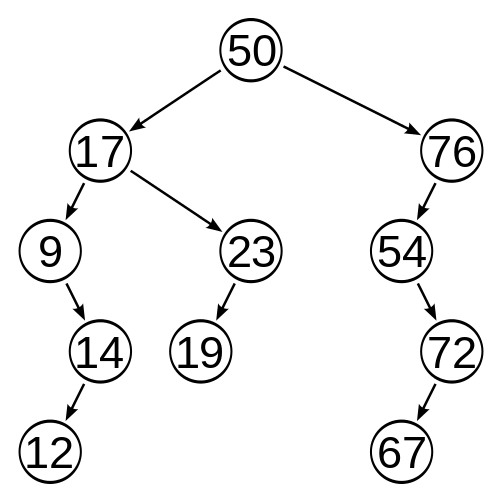

## Balanced tree

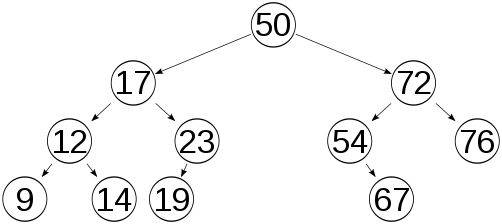



## Hash table

Consider the 'universe' of all possible input data. 

Hash function: takes a key and returns a position in an array. Your array will be much smaller than your 'universe'. The array may be expanded as it gets more than X% full. 

Solutions to hash collision:

>Separate chaining: have a list in each bucket, rather than a single value. So if collision add the thing to the list. Slight storage overhead.

>Open addresses: hash function gives sequence of buckets instead of just one, which you iterate over until you find an empty one ('linear probing')

>Double hashing (used with Open Addresses as an alternative to Linear Probing). When you use a 2nd hash function to decide which bucket to go to

If code is mission critical then you might combine hash Separate Chaining and Open Addresses collision solutions

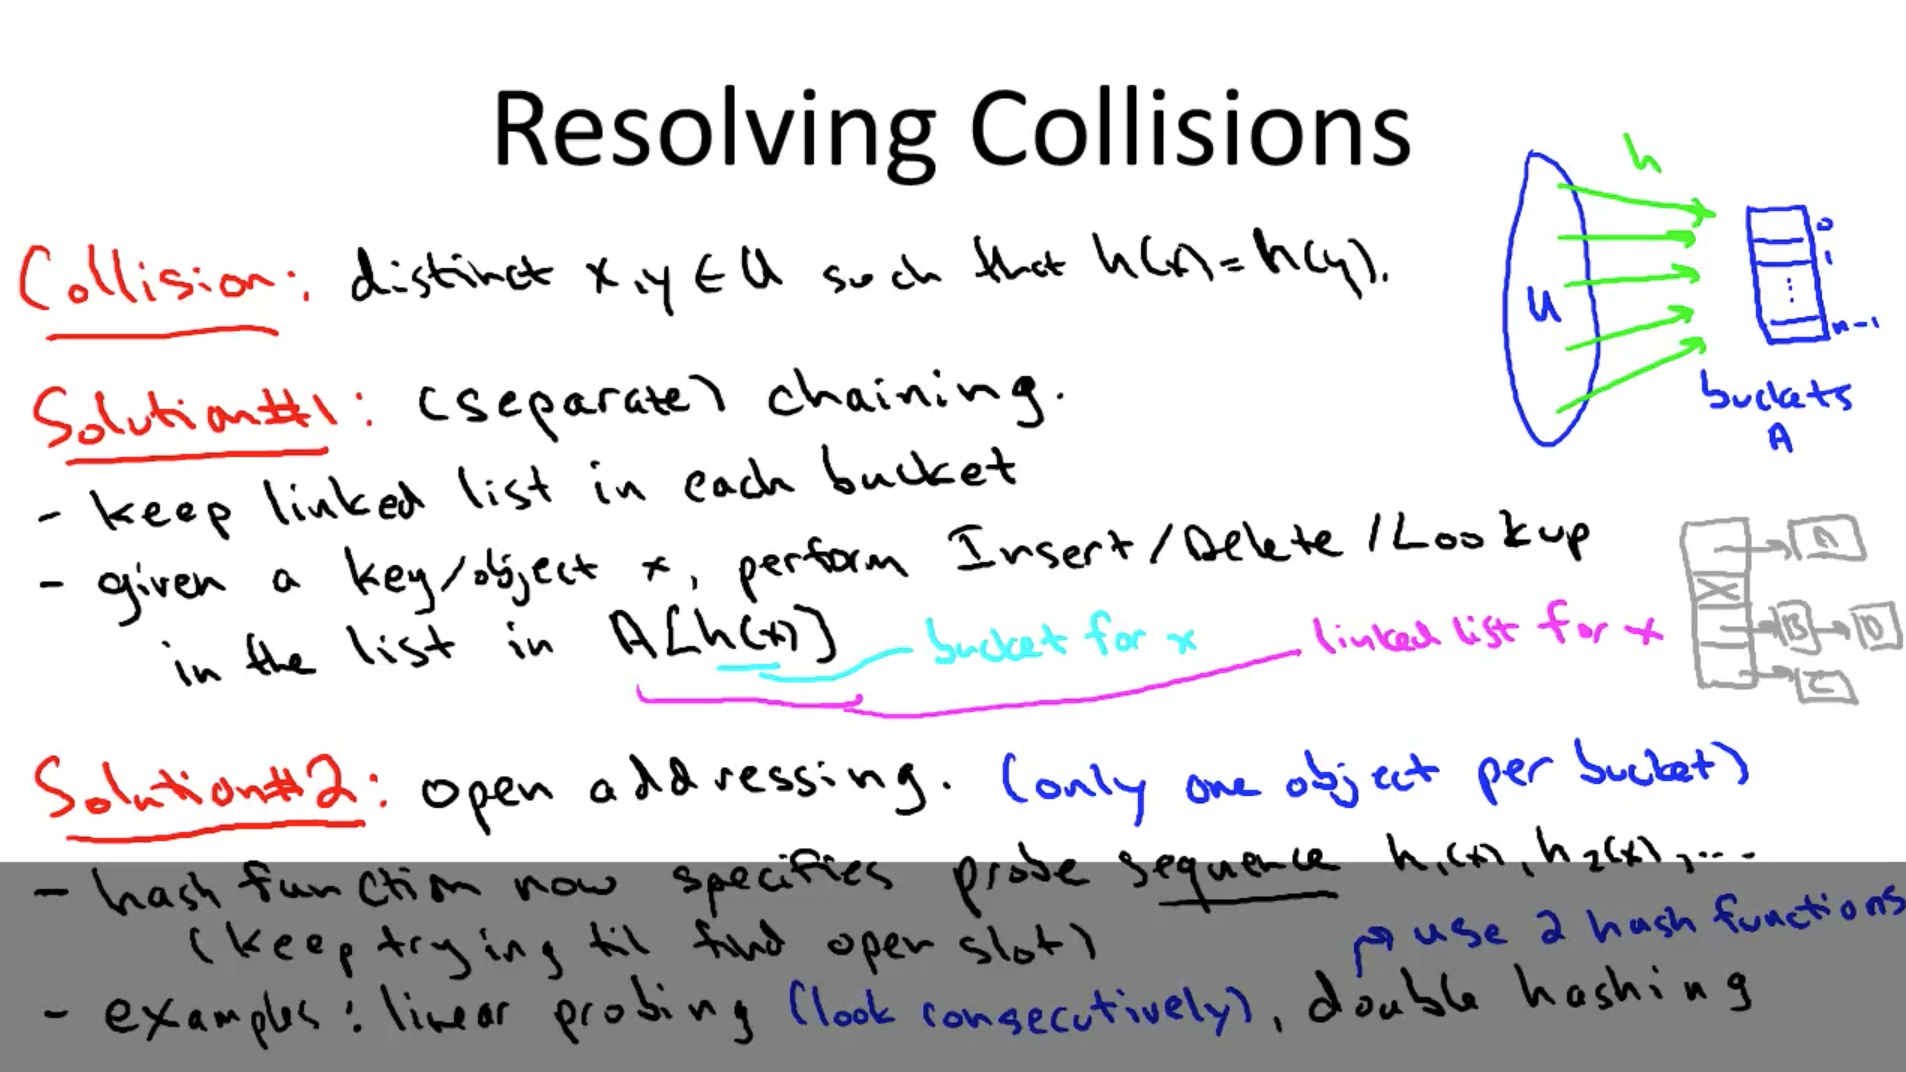


## Hash functions

The ideal: completely random hashing (ie, uniform random chance of linking to each possible bucket in array)

Might want to transform whatever your hash input is into something uniformly distributed, prior to putting it through hash table

As chart below shows, 'compression function' takes you from huge space of possible integers to bucket position. A common way of doing this is input integer to the modulus of the number of buckets. When doing this you get the fewest collisions if the number of buckets is a prime number.
    
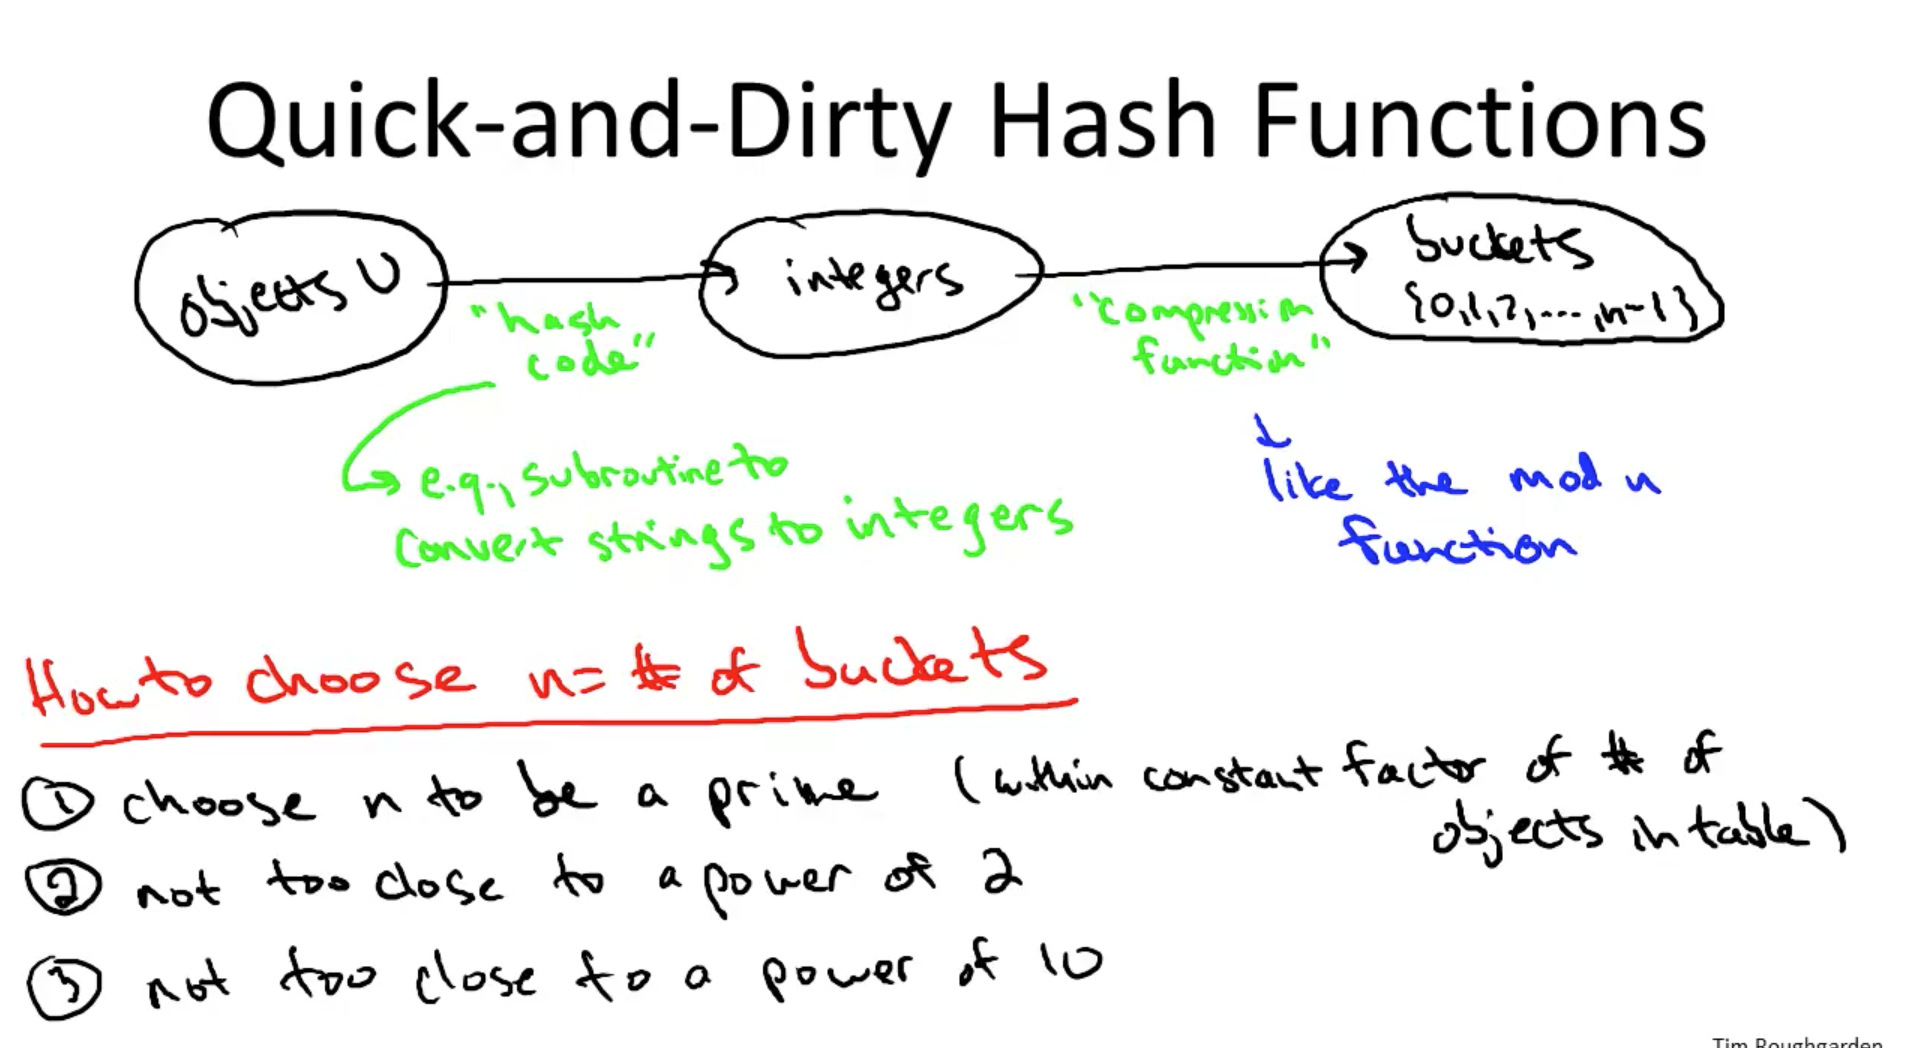
   
All hash functions have a theoretically possible 'pathological dataset' which is particularly suited to making its performance very slow

Cryptographic hash functions (eg: SHA2) are too difficult to reverse engineer a pathological dataset for. Offers protection against attack.

Another protection against pathological datasets is to use 7 different hash functions at random, making it harder for attackers to reverse engineer a pathological dataset



## Universal hashing

Load factor of hash table: N objects / N buckets

Load factor can't exceed 1 for Open addresses as, in that case, all buckets have len 1

(Unsure of definition of universal hashing)




## Bloom filter

Variant on hash tables. For faster inserts and lookups.

Pros: more space efficient, never false negatives

Cons: No deletions, can't store associated objects, risk of false positives (eg: say things are inserted when they haven't been)

Uses (where false positives not an issue and space is at a premium): early spellcheckers, forbidden passwords, network routers (lots of small things are stored for this), Cassandra uses Bloom filters for index scans to determine whether an SSTable has data for a particular row




Stores data as an array of bits. 

Think the process is similar to hash function: convert string/thing to integer; convert integer to sequence of bits

Uses k-hash functions, rather than just one

There's a tradeoff between space used and false-positive probability




In [9]:
from math import ceil, log
def calculate_bloom_filter_obj_size(n, p, k):
    """
    Returns filter size in bits
    
    n = number of items stored in filter
    p = probability of false positive on a given lookup (eg: 0.01 = 1%)
    k = number of hash functions
    
    Borrowed from https://hur.st/bloomfilter/?n=1000000&p=0.0001&m=&k=2:
    n = ceil(m / (-k / log(1 - exp(log(p) / k))))
    p = pow(1 - exp(-k / (m / n)), k)
    m = ceil((n * log(p)) / log(1 / pow(2, log(2))));
    k = round((m / n) * log(2))
    """
    
    m = ceil((n * log(p)) / log(1 / pow(2, log(2))));
    return m

calculate_bloom_filter_obj_size(10**6, 0.0001, 2)

19170117